In [1]:
from g_embedding import GraphCSR, Systems
from matplotlib.pyplot import figure
import networkx as net

# This notebook provides evaluation of the algorithm on the Zachary's karate club dataset

/home/vhhl/programs/anaconda3/envs/graph_embed/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


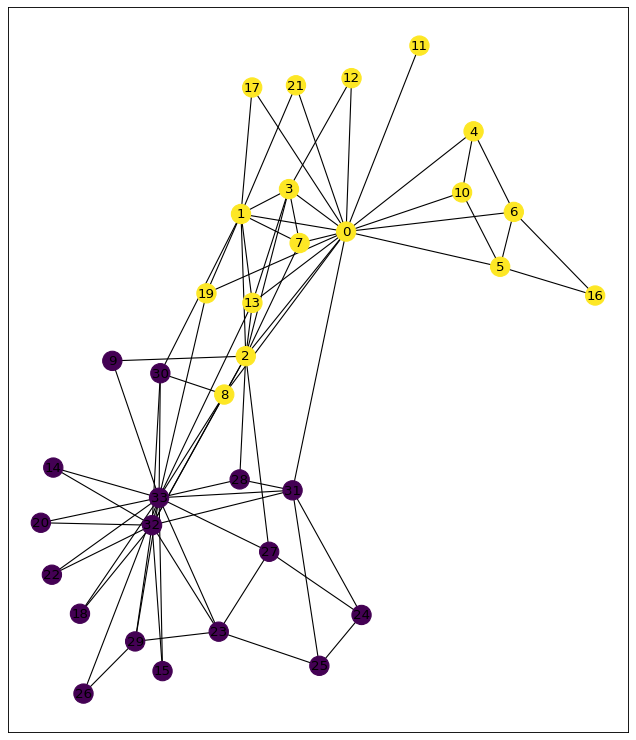

In [2]:
g = net.karate_club_graph()

figure(num=None, figsize=(10, 12), dpi=80)
pos = net.layout.fruchterman_reingold_layout(g)
net.draw_networkx(
    g,
    pos,
    node_color=[0 if g.node[n]["club"] == "Officer" else 1 for n in g.nodes], 
)
# Original sub-communities graph

In [3]:
embeddings = Systems(GraphCSR(g)).results(0.7)
# normalzie values
for i in range(embeddings.shape[0]):
    embeddings[i] /= embeddings[i].max()


/home/vhhl/programs/anaconda3/envs/graph_embed/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/vhhl/programs/anaconda3/envs/graph_embed/lib/python3.7/site-packages/scipy/sparse/_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
clustering = kmeans.fit(embeddings.T).labels_

/home/vhhl/programs/anaconda3/envs/graph_embed/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


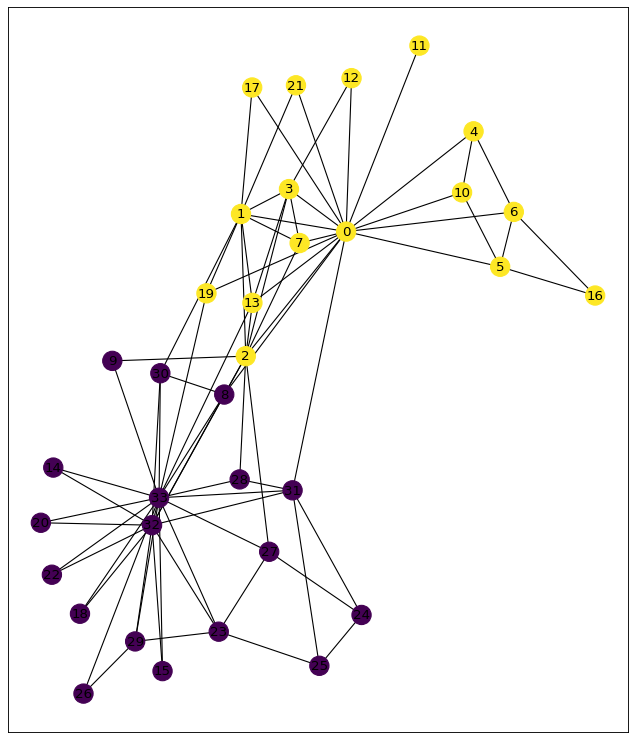

In [5]:
figure(num=None, figsize=(10, 12), dpi=80)
net.draw_networkx(
    g,
    pos,
    node_color=clustering, 
)

# Predicted clustering based on the generated embeddings